# Key Concepts 

#### GHI (Global Horizontal Irradiance) [W/m2]: 
Se refiere a la radiación solar total recibida por la superficie horizontal de la Tierra, incluyendo la radiación directa del sol, la radiación difusa (reflejada por la atmósfera) y la radiación del cielo nublado.
#### DNI (Direct Normal Irradiance) [W/m2]: 
Es la cantidad de radiación solar directa recibida por un panel solar colocado perpendicularmente al sol. No incluye la radiación difusa ni la radiación reflejada.
#### DHI (Diffuse Horizontal Irradiance) [W/m2]: 
Se refiere a la radiación solar difusa que llega a la superficie de la Tierra proveniente de todas las direcciones del cielo, excepto la radiación directa del sol.
#### EBH (Extra-terrestrial Beam Horizontal): 
Es la radiación solar directa que llegaría a la superficie de la Tierra si la atmósfera no estuviera presente. Representa la radiación solar directa del sol en el espacio.
#### Cloud Opacity (Cloudiness): 
Es la medida de la opacidad de las nubes en el cielo. Indica cuánto del cielo está cubierto por nubes y afecta la cantidad de radiación solar que llega a la superficie.

## Import Libraries

In [1]:
import numpy as np            # manejo arreglos
import pandas as pd           # manipulación dataframes      
import matplotlib.pyplot as plt    # Realiza graficas
import pytz                        # manipulación de zonas horarias                     
from datetime import datetime, date, timedelta  # manipulacion de fechas y horas

## Read CSV File

In [2]:
# Cargar los datos del archivo CSV
data = pd.read_csv('../Data/Raw/solargis.csv', sep=';')

# Crear un dataframe con los datos
df = pd.DataFrame(data)
# Cambiar el nombre de la columna 'DIF' a 'DHI'
df = df.rename(columns={'DIF': 'DHI'})
print(df.shape)
df.head(5)  # muestra los 5 primeros registros del dataframe

(48096, 16)


,Date,Time,GHI,DNI,DHI,TEMP,WS,WD,flagR,SE,SA,RH,AP,PWAT,WG,PREC
0,01.01.2023,00:05,0,0,0,11.7,1.1,342,0,-12.57,66.71,94.9,749.1,20.4,3.4,0.1
1,01.01.2023,00:15,0,0,0,11.5,1.1,344,0,-14.86,66.52,95.3,749.2,20.3,3.4,0.1
2,01.01.2023,00:25,0,0,0,11.3,1.0,346,0,-17.15,66.29,95.6,749.3,20.3,3.4,0.1
3,01.01.2023,00:35,0,0,0,11.2,1.0,348,0,-19.44,66.01,95.9,749.4,20.3,2.9,0.0
4,01.01.2023,00:45,0,0,0,11.0,1.0,350,0,-21.72,65.68,96.3,749.5,20.3,2.9,0.0


## Time zone setting all data

In [3]:
# Asegúrate de que la columna 'UTC' es de tipo datetime
df['UTC'] = pd.to_datetime(df['Time'])
# # Configura la zona horaria a UTC
df['UTC'] = df['UTC'].dt.tz_localize('UTC')
# # Convierte a la zona horaria de Colombia
df['Time_Colombia'] = df['UTC'].dt.tz_convert('America/Bogota')
# Convertir la columna 'Time_Colombia' a tipo string
df['Time_Colombia'] = df['Time_Colombia'].astype(str)
# Extraer los 4 caracteres después de los primeros 10 caracteres
df['Extracted'] = df['Time_Colombia'].str.slice(10, 16)
# delete the column 'Time_Colombia'

del df['Time_Colombia']
# delete the column 'UTC'
del df['UTC']
# # delete the column 'Date'
# del df['Date']
# delete the column 'Time'
del df['Time']
#rename the column 'Extracted' to 'Time'
df.rename(columns={'Extracted': 'Time'}, inplace=True)
print(df.shape)
df.head(5)

(48096, 16)


/var/folders/pz/w3bcsy5x2wgb_7c0fs6qmkp80000gn/T/ipykernel_71922/3929416198.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['UTC'] = pd.to_datetime(df['Time'])


,Date,GHI,DNI,DHI,TEMP,WS,WD,flagR,SE,SA,RH,AP,PWAT,WG,PREC,Time
0,01.01.2023,0,0,0,11.7,1.1,342,0,-12.57,66.71,94.9,749.1,20.4,3.4,0.1,19:05
1,01.01.2023,0,0,0,11.5,1.1,344,0,-14.86,66.52,95.3,749.2,20.3,3.4,0.1,19:15
2,01.01.2023,0,0,0,11.3,1.0,346,0,-17.15,66.29,95.6,749.3,20.3,3.4,0.1,19:25
3,01.01.2023,0,0,0,11.2,1.0,348,0,-19.44,66.01,95.9,749.4,20.3,2.9,0.0,19:35
4,01.01.2023,0,0,0,11.0,1.0,350,0,-21.72,65.68,96.3,749.5,20.3,2.9,0.0,19:45


## Group df for day

In [4]:
# Buscar en la columna "Date" las filas con el valor "01.01.2023"
row_day = df.loc[df['Date'] == '01.01.2023']
print(row_day.shape)


(144, 16)


## Graphs of single-day 

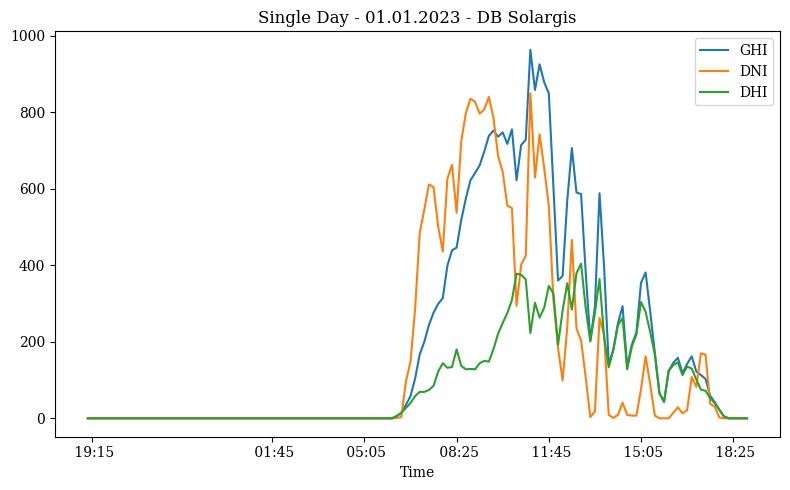

In [5]:
plt.figure(figsize=(8,5))                   # cre figura nueva y configura tamaño
plt.rcParams['font.family'] = 'serif'       # Tipo de letra
# plt.plot(row_day['GHI'], label='GHI EM Solcast', linewidth = 2, color = 'orange') # grafica
plt.title('Single Day - 01.01.2023 - DB Solargis') # titulo
plt.plot(row_day['Time'], row_day['GHI'], label='GHI')
plt.plot(row_day['Time'], row_day['DNI'], label='DNI')
plt.plot(row_day['Time'], row_day['DHI'], label='DHI')

plt.xlabel('Time')                         # Etiqueta eje x
plt.legend()
plt.xticks([1,40,60,80,100,120,140])                                # leyenda
plt.tight_layout()                          # define la mejor disposiciones de los elementos que conforman la grafica.

## Date of single-day

In [8]:
# Eliminar las filas de 'row_day' que tienen 0 en la columna 'GHI'
row_day = row_day.loc[row_day['GHI'] != 0]
# print(row_day)


# Calcular el promedio de los valores en la columna 'GHI'
average_GHI = row_day['GHI'].max()
print("average_GHI: ", average_GHI)
# Calcular el promedio de los valores en la columna 'DNI'
average_DNI = row_day['DNI'].max()
print("average_DNI: ", average_DNI)
# Calcular el promedio de los valores en la columna 'DHI'
average_DHI = row_day['DHI'].max()
print("average_DHI: ", average_DHI)


average_GHI:  963
average_DNI:  849
average_DHI:  404


## New df with daily information

In [10]:
# print(df.shape)
# Obtener los valores únicos en la columna 'Date'
unique_dates = df['Date'].unique()
# print(unique_dates)


# Filtrar los datos donde 'GHI' no es 0
df_filtered = df[df['GHI'] != 0]
# Encontrar el promedio de 'GHI' para cada fecha única, excluyendo los valores donde 'GHI' es 0
average_GHI_per_date = df_filtered.groupby('Date')['GHI'].max()
average_DHI_per_date = df_filtered.groupby('Date')['DHI'].max()
average_DNI_per_date = df_filtered.groupby('Date')['DNI'].max()
# print(average_GHI_per_date)

# Crear un nuevo DataFrame
new_df = pd.DataFrame({
    'Date': unique_dates,
    'Average_GHI': average_GHI_per_date.values,
    'Average_DHI': average_DHI_per_date.values,
    'Average_DNI': average_DNI_per_date.values
})

print(new_df.head())
print(new_df.shape)

         Date  Average_GHI  Average_DHI  Average_DNI
0  01.01.2023          963          404          849
1  02.01.2023          854          496          603
2  03.01.2023          561          422          353
3  04.01.2023          925          437          666
4  05.01.2023          877          428          785
(334, 4)


## Graph for Daily information

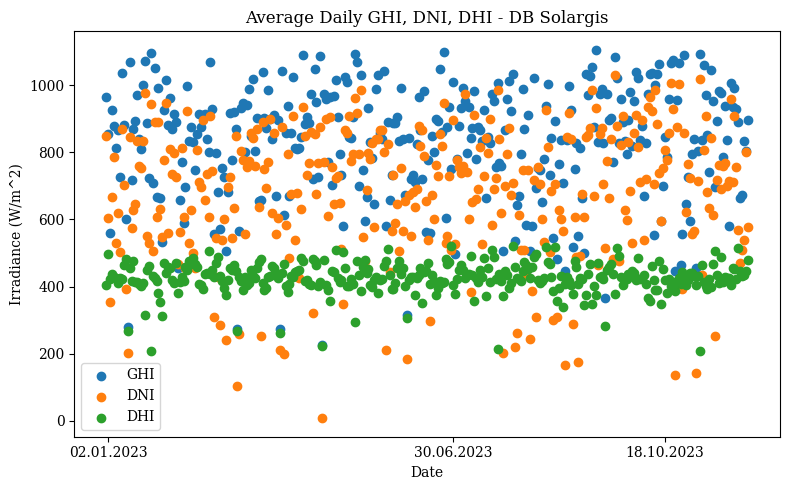

In [11]:
# Crear una figura
plt.figure(figsize=(8,5))
plt.rcParams['font.family'] = 'serif'
#scatter plot
plt.scatter(new_df['Date'], new_df['Average_GHI'], label='GHI')
plt.scatter(new_df['Date'], new_df['Average_DNI'], label='DNI')
plt.scatter(new_df['Date'], new_df['Average_DHI'], label='DHI')
# plt.plot(new_df['Date'], new_df['Average_GHI'], label='GHI')
# plt.plot(new_df['Date'], new_df['Average_DNI'], label='DNI')
# plt.plot(new_df['Date'], new_df['Average_DHI'], label='DHI')
plt.title('Average Daily GHI, DNI, DHI - DB Solargis')
plt.xlabel('Date')
plt.ylabel('Irradiance (W/m^2)')
plt.legend()
plt.xticks([1,180,290])
plt.tight_layout()



## New df with month information

In [12]:
# print(new_df.head())
# print(new_df.shape)

# Extraer el mes de la columna 'Date'
new_df['Month'] = new_df['Date'].str.split('.').str.get(1)

# print(new_df.head())
# print(new_df.shape)

unique_month = new_df['Month'].unique()
# print(unique_month)

# Encontrar el promedio de 'GHI' para cada mes
average_GHI_per_month = new_df.groupby('Month')['Average_GHI'].max()
average_DHI_per_month = new_df.groupby('Month')['Average_DHI'].max()
average_DNI_per_month = new_df.groupby('Month')['Average_DNI'].max()
# print(average_GHI_per_month)
# print(average_DHI_per_month)
# print(average_DNI_per_month)

# Crear un nuevo DataFrame
new_df2 = pd.DataFrame({
    'Month': unique_month,
    'Average_GHI': average_GHI_per_month.values,
    'Average_DHI': average_DHI_per_month.values,
    'Average_DNI': average_DNI_per_month.values
})

# Guardar 'new_df2' como un archivo CSV
new_df2.to_csv('../Data/temporary/solargis_month.csv', index=False)

print(new_df2.head())


  Month  Average_GHI  Average_DHI  Average_DNI
0    01         1094          496          977
1    02         1069          506          947
2    03         1038          481          900
3    04         1088          508          936
4    05         1093          511          986


## Graph for Month

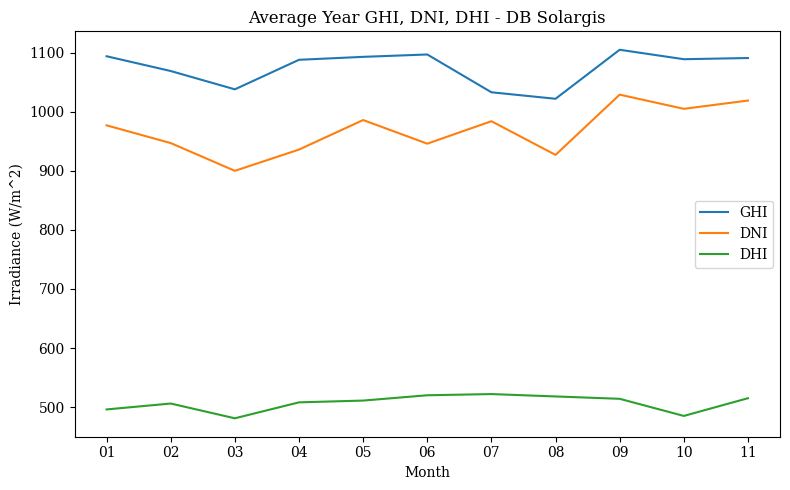

In [13]:
# Crear una figura 
plt.figure(figsize=(8,5))
plt.rcParams['font.family'] = 'serif'
#scatter plot
# plt.scatter(new_df2['Month'], new_df2['Average_GHI'], label='GHI')
# plt.scatter(new_df2['Month'], new_df2['Average_DNI'], label='DNI')
# plt.scatter(new_df2['Month'], new_df2['Average_DHI'], label='DHI')
plt.plot(new_df2['Month'], new_df2['Average_GHI'], label='GHI')
plt.plot(new_df2['Month'], new_df2['Average_DNI'], label='DNI')
plt.plot(new_df2['Month'], new_df2['Average_DHI'], label='DHI')
plt.title('Average Year GHI, DNI, DHI - DB Solargis')
plt.xlabel('Month')
plt.ylabel('Irradiance (W/m^2)')
plt.legend()
# plt.xticks([1,2,3,4,5,6,7,8,9,10,11])
plt.tight_layout()
